6151.887549783826 12193.966557121492


/tmp/ipykernel_815/99375568.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


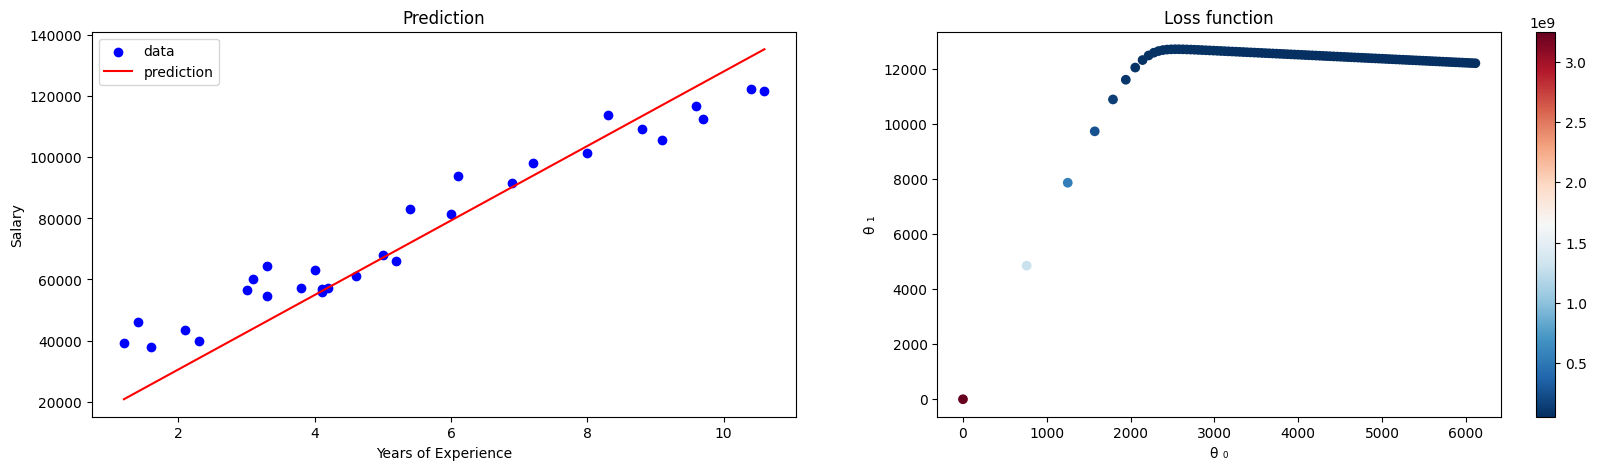

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def hypothesis(theta_0, theta_1, x):
    y_pred = theta_0 + (theta_1 * x)
    return(y_pred)

def CostFunction(theta_0, theta_1, x, y):
    s = 0
    m = len(x)
    for (i,j) in list(zip(x,y)):
        s += ((hypothesis(theta_0, theta_1, i) - j)**2)
    error = s/(2*m)
    return(error)

def GradientDescent(theta_0, theta_1, x, y, learning_rate):
    s0 = 0
    s1 = 0
    m = len(x)
    for (i,j) in list(zip(x, y)):
        s0 += (hypothesis(theta_0, theta_1, i) - j)
        s1 += ((hypothesis(theta_0, theta_1, i) - j)*(i))
    temp0 = theta_0 - (learning_rate * (s0/m))
    temp1 = theta_1 - (learning_rate * (s1/m))

    theta_0 = temp0
    theta_1 = temp1

    return(theta_0, theta_1)


df = pd.read_csv("/mnt/c/MachineLearning/LinearRegression/Salary_dataset.csv") #Directory can be changed here

del df['Unnamed: 0']

X = list(df['YearsExperience'])
Y = list(df['Salary'])

t0 = 0
t1 = 0

loss = []

t_0 = []
t_1 = []

for j in range(100):
    l = CostFunction(t0, t1, X, Y)
    loss.append(l)
    t_0.append(t0)
    t_1.append(t1)
    t0, t1 = GradientDescent(t0, t1, X, Y, 0.01)

new_t0 = t0
new_t1 = t1

print(new_t0, new_t1)

new_Y = []

for i in X:
    y_pred = hypothesis(new_t0, new_t1, i)
    new_Y.append(y_pred)


subscript_numbers = '₀₁₂₃₄₅₆₇₈₉'

def subscript_number(number):
    return ''.join(subscript_numbers[int(digit)] for digit in str(number))

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(X, Y, color='blue', label='data')
ax[0].plot(X, new_Y, color='red', label='prediction')
ax[0].set_xlabel('Years of Experience')
ax[0].set_ylabel('Salary')
ax[0].set_title('Prediction')
ax[0].legend()

g = ax[1].scatter(t_0, t_1, c=loss, cmap='RdBu_r')
fig.colorbar(g, ax=ax[1])
ax[1].set_xlabel(f'θ {subscript_number(0)}')
ax[1].set_ylabel(f'θ {subscript_number(1)}')
ax[1].set_title('Loss function')

fig.show()

# Another Method

In [2]:
import numpy as np

In [17]:
class LinearRegression:
    def __init__(self, features, labels, learning_rate, epochs):
        self.features = np.array(features)
        self.labels = np.array(labels)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_1 = 0
        self.theta_0 = 0
    
    def fit(self):
        l_loss_theta_0 = []
        l_loss_theta_1 = []
        l_epochs = []
        for _ in range(self.epochs):
            l_epochs.append(_)
            predictions = (self.features*self.theta_1) + self.theta_0

            m = len(self.labels)

            errors = predictions - self.labels

            l_loss_theta_0.append((np.sum(errors**2)/(2*m)))
            l_loss_theta_1.append((np.sum((errors*self.features)**2)/(2*m)))

            temp0 = self.theta_0 - ((self.learning_rate/m)*np.sum(errors))
            temp1 = self.theta_1 - ((self.learning_rate/m)*np.sum(errors*self.features))

            self.theta_0 = temp0
            self.theta_1 = temp1
        return(l_loss_theta_0, l_loss_theta_1, l_epochs)
    
    def predict(self, x_test):
        prediction = (self.theta_1 * x_test) + self.theta_0
        return(prediction)

In [18]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [19]:
X = df['YearsExperience']
Y = df['Salary']

# Applying Feature Scaling to data

In [20]:
Xmax = X.max()
Xmin = X.min()
Xrange = Xmax - Xmin
Xmean = X.mean()

X = ((X - Xmean)/Xrange)

In [21]:
model = LinearRegression(X, Y, 0.01, 80)

In [22]:
l_theta0, l_theta1, l_epochs = model.fit()

In [23]:
a = X.iloc[0]
b = Y.iloc[0]
print(a,b)

-0.44822695035460985 39344.0


In [24]:
h = model.predict(a)

In [25]:
print(b, h)

39344.0 39279.46574231818


# Generating graphs for loss with respect to &theta;<sub>j</sub>

/tmp/ipykernel_815/1226977124.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


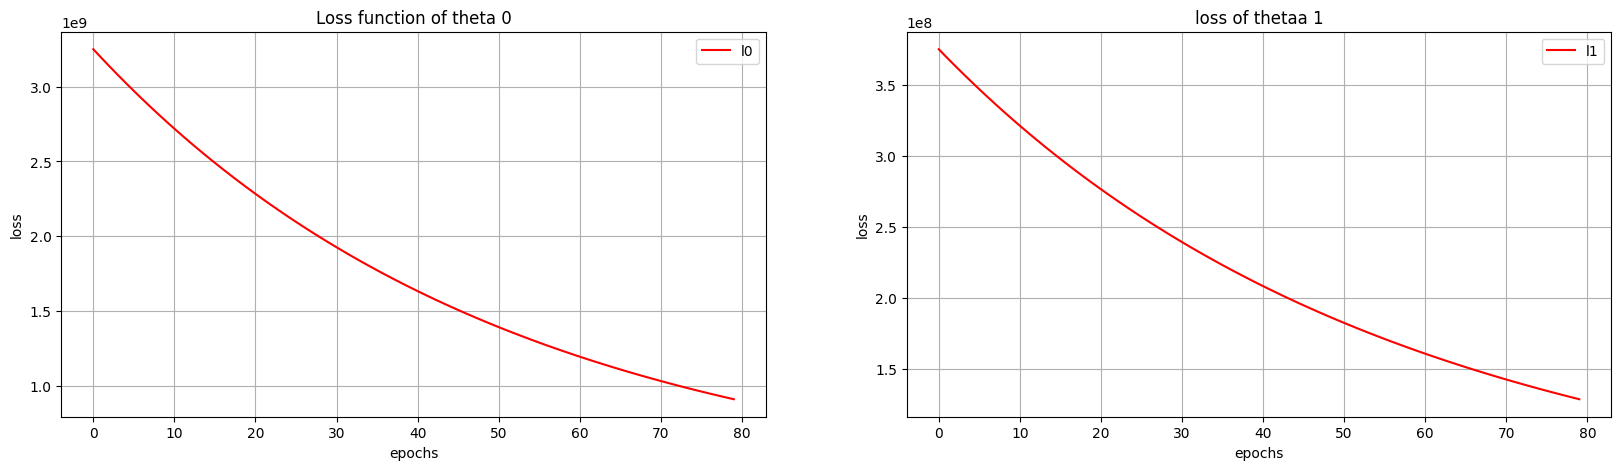

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].plot(l_epochs, l_theta0, color='red', label='l0')
ax[0].grid(True)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Loss function of theta 0')
ax[0].legend()

ax[1].plot(l_epochs, l_theta1, color='red', label='l1')
ax[1].grid(True)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('loss of thetaa 1')
ax[1].legend()

fig.show()